# **İMDB FİLM İNCELEMELERİ İLE DUYGU ANALİZİ PROJESİ**



1.  Muhammet Emin Akyüz-030718106
2.  Veysel Hacı Hazar-030718108
3.  Soner Karaevli-030716005
4.  Yakup Yıldırım-030716034












In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


In [2]:
!ls 'My Drive/COLABS/'

bank.csv	    İMDB_Derin_Öğrenme_Projesi.ipynb  Test.ipynb
Deneme_001.ipynb    IMDB_Veriseti_v1.csv	      veri_seti_3.csv
housepricedata.csv  IMDB_Veriseti_v2.csv


**Kullanılacak Kütüphanelerimizi Ekleyelim**


In [3]:
#KÜTÜPHANE BÖLÜMÜ
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.models  import load_model
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM,Dropout
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.recurrent import GRU
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping






**Bu Kısımda İMDB Veri Setimizden İlk 15 Verimizin inceleme ve duygu sütunlarını getirdik.**

In [4]:
#Veri Yükleme
imdb_verisi = pd.read_csv('My Drive/COLABS/IMDB_Veriseti_v1.csv')
imdb_verisi.head(15)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
#Veri Yükleme_2
imdb_verisi_2 = pd.read_csv('My Drive/COLABS/IMDB_Veriseti_v2.csv',low_memory=False)
imdb_verisi_2.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


**Aşağıda yazdığımız imdb_verisi.isna()  metodu ile NaN(Not a number) isimlendirilen verilerimizin ileride problem olmaması için bunları tespit ediyoruz.NaN değerlerinin olduğu satırlarda sonuç True ,olmayan sütunlarda ise False olarak dönüş yapıyor.**

In [6]:
imdb_verisi.isna()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [7]:
imdb_verisi_2.isna()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
85851,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
85852,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True
85853,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,True


**Print  ile 50000 satırdan ve 2 sütundan oluştuğu öğrenildi.**

In [8]:
print(imdb_verisi.shape)

(50000, 2)


**Print  ile 85855 satırdan ve 22 sütundan oluştuğu öğrenildi.**

In [9]:
print(imdb_verisi_2.shape)

(85855, 22)


**Duygu sayılarına value_counts() metodu ile bu kısımda bakalım.**

In [10]:
imdb_verisi['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**Ülke sayılarına value_counts() metodu ile bu kısımda baktık.**

In [11]:
imdb_verisi_2['country'].value_counts()

USA                                                28511
India                                               6065
UK                                                  4111
Japan                                               3077
France                                              3055
                                                   ...  
Canada, Germany, France, USA                           1
USA, Germany, Hungary, Poland, Bulgaria, Canada        1
Germany, UK, Georgia, France                           1
Ecuador, Mexico                                        1
Italy, France, West Germany, Monaco                    1
Name: country, Length: 4907, dtype: int64

**Kullanılan dil sayılarına value_counts() metodu ile bu kısımda baktık.**





In [12]:
imdb_verisi_2['language'].value_counts()

English                                                                      35939
French                                                                        3903
Spanish                                                                       2831
Japanese                                                                      2826
Italian                                                                       2731
                                                                             ...  
Mandarin, Chinese, Hokkien, English                                              1
Turkish, Azerbaijani, Russian, English, Spanish, Japanese, French, Arabic        1
Italian, Occitan, French                                                         1
English, Romany, Romanian, Ukrainian                                             1
Finnish, German, Russian, Spanish                                                1
Name: language, Length: 4377, dtype: int64

**Yazarların sayılarına value_counts() metodu ile bu kısımda baktık.**

In [13]:
imdb_verisi_2['writer'].value_counts()

Jing Wong                                84
Kuang Ni                                 45
Woody Allen                              40
Erdogan Tünas                            35
Leonardo Benvenuti, Piero De Bernardi    34
                                         ..
David DeCoteau, Rolfe Kanefsky            1
José Luis Garci, María Lejárraga          1
Rory Kindersley, Drew Sherring-Hill       1
Greg Iles, Greg Iles                      1
Jirí Blazek, Jirí Menzel                  1
Name: writer, Length: 66859, dtype: int64

**imdb_verisi.describe() ile istatistiksel sonuçların hesaplanmasını sağlıyor.**

In [14]:
imdb_verisi.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**imdb_verisi_2.describe() ile istatistiksel sonuçların hesaplanmasını sağlıyor.**

In [15]:
imdb_verisi_2.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


**Veri setimizin birçok bilgisine bununla ulaşılır.**

In [16]:
imdb_verisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**Sütun verilerinin bilgisini verir.**

In [17]:
imdb_verisi.columns

Index(['review', 'sentiment'], dtype='object')

**Sentiment Sütununu Grafik olarak gösterdik.Verilen positive ve negatif değerler birbirine eşit olduğu görülüyor.**




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



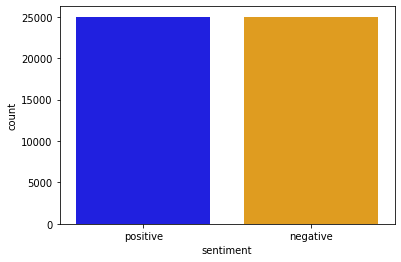

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [18]:
sns.countplot(imdb_verisi["sentiment"], palette = ["blue","orange"])
plt.show()
print(imdb_verisi.sentiment.value_counts())

**IMDB 2. veri setimizin votes ve avg_note kısımlarını matplot kütüphanesi ile şekillendirdik.**

Text(0, 0.5, 'votes')

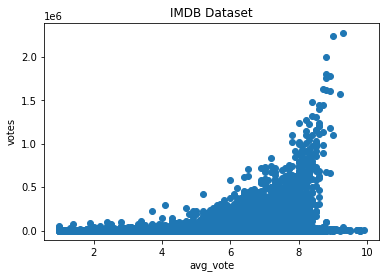

In [19]:

fig, vyes = plt.subplots()
vyes.scatter(imdb_verisi_2['avg_vote'], imdb_verisi_2['votes'])
vyes.set_title('IMDB Dataset')
vyes.set_xlabel('avg_vote')
vyes.set_ylabel('votes')

**IMDB 2. veri setimizin duration sütun kısmını matplot kütüphanesi ile çektik**

**Sentimentlerimizdeki positiflere 1 değeri ve negatiflere 0 değerini veriyoruz**

In [20]:
imdb_verisi.sentiment = [ 1 if each == "positive" else 0 for each in imdb_verisi.sentiment ]

In [21]:
sentiment = imdb_verisi['sentiment'].values
sentiment

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
imdb_verisi = imdb_verisi['review']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(imdb_verisi,sentiment,test_size=0.25,random_state=48)


**İngilizce'de en çok kullanılan 18000 kelimeden oluşan bir sözlük oluşturuyoruz.**

In [24]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenci=Tokenizer(num_words=18000)
tokenci.fit_on_texts(imdb_verisi)


**Farklı uzunluklarda olan yorumlarımız RNN modelini eğitemez.Bu sebepten dolayıda cümleleri eşit boyutta yapmamız gerekiyor.**

In [25]:
X_train_Tokens = tokenci.texts_to_sequences(X_train)
X_test_Tokens = tokenci.texts_to_sequences(X_test)



**Cümlelerimizdeki her bir kelimenin,yukarıda tanımladığımız ve oluşturduğumuz 18000 kelimeden oluşan sözlüğün herhangi bir indeksle değişiyoruz.**

In [26]:
#Verilerimizdeki her cümlemizin kelime sayımını alıp bir liste oluşturuyoruz. 
token_1 = [len(tokens) for tokens in X_train_Tokens + X_test_Tokens]
token_1 = np.array(token_1)

In [27]:
#Token sayıları belirlenirken, ortalama etrafındaki değişiklikler dikkate alınarak sayılar belirlenniyor.
token_2 = np.mean(token_1) + 2 * np.std(token_1)
token_2 = int(token_2)
token_2

561

**token_2= Bu değerimiz verilerimizdeki cümlemizin dağılımını ve eğer varsada zıt uzunluklara sahip cümleleri ortalamaya indirmemize sağlayabileyecektir.**

In [28]:
#Belirlediğimiz bu sayının verilerde yüzde kaçına ait olduğu bakılır.
np.sum(token_1 < token_2) / len(token_1)

0.94546

In [29]:
#Verilimiz belirtilen belirteç sayısına göre belirlenir.
X_train_Padd = pad_sequences(X_train_Tokens, maxlen=token_2)
X_test_Padd = pad_sequences(X_test_Tokens, maxlen=token_2)



In [30]:
X_train_Padd.shape



(37500, 561)

**Görüldüğü gibi şekli 561 e ayarladık**

In [31]:
idgrq= tokenci.word_index
ters_h = dict(zip(idgrq.values(), idgrq.keys()))

def ornek_cumle(tokens):
    kelimeler = [ters_h[token] for token in tokens if token!=0]
    yazı = ' '.join(kelimeler)
    return yazı

In [32]:
print(ornek_cumle(X_train_Padd[8]))

susan seems to have had a decent career with a few top notch credits under her belt i'm certainly glad she back from this film which seems to have its admirers i'm not one of them br br i've seen better acting in high school plays than i did in the plot such as it is involved young susan who is ambitious to make it in the world of music and is willing to do just about anything to get there she even rejects the sincere advances of a young artist who is living out of his van off the east river played by brad br br young mr contributes the worst performance in the film in fact one of the worst acting jobs i've seen in a long time no wonder he's not gone anywhere br br i will say that eye for the camera is a good one in capturing the familiar east village locations where the film was mostly shot but her work with her live performers didn't measure up i'm not sure she had that much raw material to work with br br look fast and you'll see a very young christopher before law and order and sex

In [33]:
print(X_train_Padd[8])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

**Birinci LSTM modelimiz ile derin öğrenme yaptık.**

In [34]:
#LSTM modelimiz ile öğretelim.
model = Sequential()
model.add(Embedding(input_dim=18000,output_dim=60,input_length=token_2,name='embedding_layer1'))

model.add(LSTM(units=14, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=7, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=3))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer1 (Embedding) (None, 561, 60)           1080000   
_________________________________________________________________
lstm (LSTM)                  (None, 561, 14)           4200      
_________________________________________________________________
dropout (Dropout)            (None, 561, 14)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 561, 7)            616       
_________________________________________________________________
dropout_1 (Dropout)          (None, 561, 7)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3)                 132       
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                 0

In [36]:
history_1 = model.fit(X_train_Padd,Y_train, validation_split=0.28, epochs=6, batch_size=1500, shuffle=True, verbose=1)

Epoch 1/6
18/18 [==============================] - 116s 6s/step - loss: 0.6925 - accuracy: 0.5364 - val_loss: 0.6911 - val_accuracy: 0.6198
Epoch 2/6
18/18 [==============================] - 116s 7s/step - loss: 0.6846 - accuracy: 0.6126 - val_loss: 0.6699 - val_accuracy: 0.6600
Epoch 3/6
18/18 [==============================] - 108s 6s/step - loss: 0.6190 - accuracy: 0.7219 - val_loss: 0.5621 - val_accuracy: 0.8092
Epoch 4/6
18/18 [==============================] - 109s 6s/step - loss: 0.5725 - accuracy: 0.7823 - val_loss: 0.5460 - val_accuracy: 0.8059
Epoch 5/6
18/18 [==============================] - 108s 6s/step - loss: 0.5109 - accuracy: 0.8449 - val_loss: 0.5111 - val_accuracy: 0.8226
Epoch 6/6
18/18 [==============================] - 108s 6s/step - loss: 0.4621 - accuracy: 0.8763 - val_loss: 0.4729 - val_accuracy: 0.8381


In [37]:
result_1 = model.evaluate(X_test_Padd,Y_test)

391/391 [==============================] - 66s 166ms/step - loss: 0.4755 - accuracy: 0.8333


**Result_1'de başarı oranımız yüzde 84 yakaladık.**

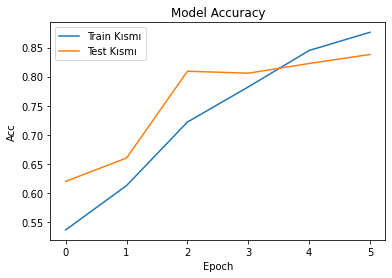

In [38]:
plt.figure()
plt.plot(history_1.history["accuracy"], label = "Train Kısmı" )
plt.plot(history_1.history["val_accuracy"], label= "Test Kısmı")
plt.title("Model Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

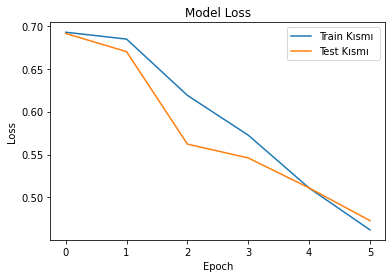

In [39]:
plt.figure()
plt.plot(history_1.history["loss"], label= "Train Kısmı ")
plt.plot(history_1.history["val_loss"], label= "Test Kısmı")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

**İkinci LSTM modelimizi deniyoruz**

In [40]:
model_2=Sequential()

model_2.add(Embedding(input_dim=20000, output_dim=129,input_length=token_2))
model_2.add(LSTM(units=60, activation='tanh'))
model_2.add(Dense(units=1, activation='sigmoid'))

adam= tf.keras.optimizers.Adam(learning_rate=0.0001)

model_2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 561, 129)          2580000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                45600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 2,625,661
Trainable params: 2,625,661
Non-trainable params: 0
_________________________________________________________________


In [42]:
history_2=model_2.fit(X_train_Padd, Y_train, epochs=5,validation_split=0.34, batch_size=128, shuffle=True, verbose=1)

Epoch 1/5
194/194 [==============================] - 342s 2s/step - loss: 0.6787 - accuracy: 0.6175 - val_loss: 0.6105 - val_accuracy: 0.6902
Epoch 2/5
194/194 [==============================] - 341s 2s/step - loss: 0.4442 - accuracy: 0.8231 - val_loss: 0.3768 - val_accuracy: 0.8515
Epoch 3/5
194/194 [==============================] - 340s 2s/step - loss: 0.2981 - accuracy: 0.8960 - val_loss: 0.3140 - val_accuracy: 0.8801
Epoch 4/5
194/194 [==============================] - 336s 2s/step - loss: 0.2296 - accuracy: 0.9230 - val_loss: 0.3036 - val_accuracy: 0.8809
Epoch 5/5
194/194 [==============================] - 334s 2s/step - loss: 0.1839 - accuracy: 0.9406 - val_loss: 0.2815 - val_accuracy: 0.8885


In [43]:
result_2 = model_2.evaluate(X_test_Padd,Y_test)

391/391 [==============================] - 48s 123ms/step - loss: 0.2764 - accuracy: 0.8893


**Result_2 sonucumuzda yüzde 89 başarı oranı yakaladık.**

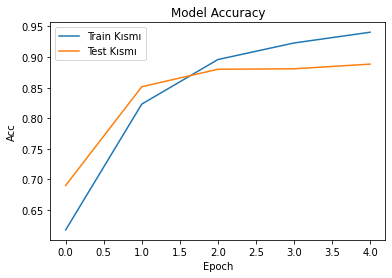

In [44]:
plt.figure()
plt.plot(history_2.history["accuracy"], label = "Train Kısmı" )
plt.plot(history_2.history["val_accuracy"], label= "Test Kısmı")
plt.title("Model Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

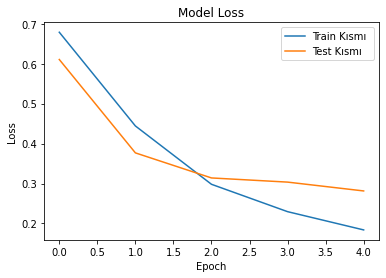

In [45]:
plt.figure()
plt.plot(history_2.history["loss"], label= "Train Kısmı ")
plt.plot(history_2.history["val_loss"], label= "Test Kısmı")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

**GRU katmanı ile deneme yaptık.**

In [46]:
model_3=Sequential()

model_3.add(Embedding(input_dim=20000, output_dim=129,input_length=token_2))
model_3.add(GRU(units=60, activation='tanh'))
model_3.add(Dense(units=1, activation='sigmoid'))

adam= tf.keras.optimizers.Adam(learning_rate=0.0001)

model_3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 561, 129)          2580000   
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 60)                34200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 2,614,261
Trainable params: 2,614,261
Non-trainable params: 0
_________________________________________________________________


In [48]:
history_3=model_3.fit(X_train_Padd, Y_train, epochs=5,validation_split=0.34, batch_size=128, shuffle=True, verbose=1)

Epoch 1/5
194/194 [==============================] - 291s 1s/step - loss: 0.6869 - accuracy: 0.5928 - val_loss: 0.6723 - val_accuracy: 0.6541
Epoch 2/5
194/194 [==============================] - 289s 1s/step - loss: 0.4668 - accuracy: 0.7950 - val_loss: 0.3386 - val_accuracy: 0.8605
Epoch 3/5
194/194 [==============================] - 291s 1s/step - loss: 0.2553 - accuracy: 0.9017 - val_loss: 0.2905 - val_accuracy: 0.8786
Epoch 4/5
194/194 [==============================] - 291s 1s/step - loss: 0.1921 - accuracy: 0.9319 - val_loss: 0.2831 - val_accuracy: 0.8852
Epoch 5/5
194/194 [==============================] - 305s 2s/step - loss: 0.1508 - accuracy: 0.9510 - val_loss: 0.2888 - val_accuracy: 0.8845


In [49]:
result_3 = model_3.evaluate(X_test_Padd,Y_test)

391/391 [==============================] - 40s 103ms/step - loss: 0.2844 - accuracy: 0.8848


**Result_3 sonucumuzda yüzde 89 başarı oranı yakaladık.**

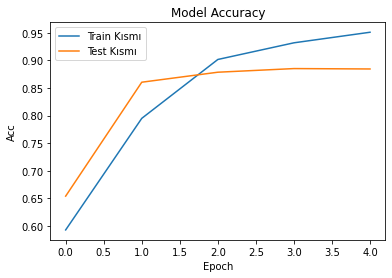

In [50]:
plt.figure()
plt.plot(history_3.history["accuracy"], label = "Train Kısmı" )
plt.plot(history_3.history["val_accuracy"], label= "Test Kısmı")
plt.title("Model Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

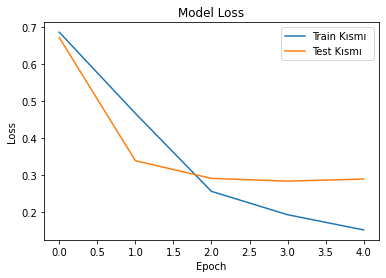

In [51]:
plt.figure()
plt.plot(history_3.history["loss"], label= "Train Kısmı ")
plt.plot(history_3.history["val_loss"], label= "Test Kısmı")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

**İkinci veri seti**

In [52]:
imdb_verisi_2 = pd.read_csv('My Drive/COLABS/IMDB_Veriseti_v2.csv',low_memory=False)
imdb_verisi_2.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0


**Genre sütunu ile ikinci veri seti görselleştirdik.**

In [53]:
Visualization = px.pie(values=imdb_verisi_2['genre'].value_counts(), 
             names=imdb_verisi_2['genre'].value_counts().index,title='Genre sütununun içeriği')

Visualization.show()

In [54]:
imdb_verisi_2.nunique()#Her satırda benzersiz içerik bulmak için kullanılır.

imdb_title_id            85855
title                    82094
original_title           80852
year                       113
date_published           22012
genre                     1257
duration                   266
country                   4907
language                  4377
director                 34733
writer                   66859
production_company       32050
actors                   85729
description              83611
avg_vote                    89
votes                    14933
budget                    4642
usa_gross_income         14857
worlwide_gross_income    30414
metascore                   99
reviews_from_users        1213
reviews_from_critics       595
dtype: int64

In [55]:
imdb_verisi_2.isnull().sum()#NaN mevcut olan her sütunun sayısını verecektir.

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [56]:
imdb_verisi_2.country.fillna("Country Unvailable",inplace=True)

In [57]:
imdb_verisi_2.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

**Üçüncü veri seti**

In [58]:
veri_seti_3 = pd.read_csv('My Drive/COLABS/veri_seti_3.csv')
print(veri_seti_3.shape)
veri_seti_3.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [59]:
veri_seti_3.nunique()#Her satırda benzersiz içerik bulmak için kullanılır.

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [60]:
veri_seti_3.isnull().sum()#NaN mevcut olan her sütunun sayısını verecektir.

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**3.veri setimizdeki verileri temizleyeceğiz**

**Yukarıdaki sonuçlardan; director,cast,country,date_added ve rating sütunlarının eksik değerlere sahip olduğunu görebiliriz.İlk olarak,bu eksik değerleri ele alıyorum.**



In [61]:
veri_seti_3.director.fillna("No Director",inplace=True)
veri_seti_3.cast.fillna("No Cast",inplace=True)
veri_seti_3.country.fillna("Country Unvailable",inplace=True)
veri_seti_3.dropna(subset=["date_added","rating"],inplace=True)

In [62]:
veri_seti_3.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**İkinci veri setimizdeki ilk 5 satırımızdaki title ve ratings sütunlarını listeledik**

In [63]:

yeni_ratings = pd.DataFrame({'Title':imdb_verisi_2.title,
                             'Rating':imdb_verisi_2.avg_vote})
yeni_ratings.drop_duplicates(subset=['Title','Rating'],inplace=True)

print(yeni_ratings.shape)
yeni_ratings.head(5)

(85733, 2)


,Title,Rating
0,Miss Jerry,5.9
1,The Story of the Kelly Gang,6.1
2,Den sorte drøm,5.8
3,Cleopatra,5.2
4,L'Inferno,7.0


In [64]:
ınner_verisi = yeni_ratings.merge(veri_seti_3,left_on='Title',right_on='title',how='inner')
ınner_verisi = ınner_verisi.sort_values(by='Rating',ascending=False)

print(ınner_verisi.shape)
ınner_verisi.head(5)

(2719, 14)


,Title,Rating,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
987,Breakout,9.0,s1093,TV Show,Breakout,No Director,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",Country Unvailable,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
976,Innocent,9.0,s3009,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
371,Schindler's List,8.9,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
389,Pulp Fiction,8.9,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
1284,Inception,8.8,s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."


In [65]:
Yeni_Data=ınner_verisi[['Title','Rating','type']]

Yeni_Data.drop_duplicates(subset=['Title','Rating','type'],inplace=True)
print(Yeni_Data.shape)
Yeni_Data.head(5)

(2719, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Rating,type
987,Breakout,9.0,TV Show
976,Innocent,9.0,TV Show
371,Schindler's List,8.9,Movie
389,Pulp Fiction,8.9,Movie
1284,Inception,8.8,Movie


In [66]:
Filmler_Data = Yeni_Data[Yeni_Data.type == 'Movie']
TVS_Data =  Yeni_Data[Yeni_Data.type == 'TV Show']
print(Filmler_Data.shape)
print(TVS_Data.shape)

(2383, 3)
(336, 3)


In [67]:
Filmler_Data = Filmler_Data.drop(['type'], axis = 1)

Filmler_Data

,Title,Rating
371,Schindler's List,8.9
389,Pulp Fiction,8.9
1284,Inception,8.8
1651,Much Ado About Nothing,8.6
598,Koshish,8.6
...,...,...
831,The Vault,1.9
571,Himmatwala,1.7
1188,Pink,1.6
1672,Welcome to New York,1.6


In [68]:
Filmler_Data['Polarity_Rating'] = Filmler_Data['Rating'].apply(lambda x:'Positive' if x > 6 else 'Negative')
Filmler_Data

,Title,Rating,Polarity_Rating
371,Schindler's List,8.9,Positive
389,Pulp Fiction,8.9,Positive
1284,Inception,8.8,Positive
1651,Much Ado About Nothing,8.6,Positive
598,Koshish,8.6,Positive
...,...,...,...
831,The Vault,1.9,Negative
571,Himmatwala,1.7,Negative
1188,Pink,1.6,Negative
1672,Welcome to New York,1.6,Negative


In [69]:
sekil = px.pie(values=Filmler_Data['Polarity_Rating'].value_counts(),
               names=Filmler_Data['Polarity_Rating'].value_counts().index)
sekil.show()

In [70]:
pozitivs = Filmler_Data[Filmler_Data['Polarity_Rating'] == 'Positive']
negativs = Filmler_Data[Filmler_Data['Polarity_Rating'] == 'Negative']

print(pozitivs.shape)
print(negativs.shape)

(1206, 3)
(1177, 3)


In [71]:
ea = Filmler_Data[['Title','Polarity_Rating']]
ea

,Title,Polarity_Rating
371,Schindler's List,Positive
389,Pulp Fiction,Positive
1284,Inception,Positive
1651,Much Ado About Nothing,Positive
598,Koshish,Positive
...,...,...
831,The Vault,Negative
571,Himmatwala,Negative
1188,Pink,Negative
1672,Welcome to New York,Negative


In [72]:
one_kods = pd.get_dummies(ea["Polarity_Rating"])
ea.drop(['Polarity_Rating'],axis=1,inplace=True)
ea = pd.concat([ea,one_kods],axis=1)
ea

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Negative,Positive
371,Schindler's List,0,1
389,Pulp Fiction,0,1
1284,Inception,0,1
1651,Much Ado About Nothing,0,1
598,Koshish,0,1
...,...,...,...
831,The Vault,1,0
571,Himmatwala,1,0
1188,Pink,1,0
1672,Welcome to New York,1,0


In [73]:
X= ea['Title'].values
y= ea.drop('Title',axis=1).values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=42)

In [74]:
X_train

array(['Green Room', 'Kate & Leopold', 'Zoom', ..., 'Leap Year',
       'The Breaker Upperers', 'Romeo Akbar Walter'], dtype=object)

In [75]:
y_train

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [76]:
vctr = CountVectorizer()
X_train = vctr.fit_transform(X_train)
X_test = vctr.transform(X_test)

sss = TfidfTransformer()
X_train =sss.fit_transform(X_train)
X_test = sss.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [77]:
model_4 = Sequential()

model_4.add(Dense(units=12673,activation ='relu'))
model_4.add(Dropout(0.2))

model_4.add(Dense(units=4000,activation ='relu'))
model_4.add(Dropout(0.2))

model_4.add(Dense(units=500,activation ='relu'))
model_4.add(Dropout(0.2))

model_4.add(Dense(units=2,activation ='sigmoid'))

opwt=tf.keras.optimizers.Adam(learning_rate=0.001)
model_4.compile(loss='binary_crossentropy',optimizer=opwt,metrics=['binary_accuracy'])

erken_durs = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)


In [78]:
wxy=model_4.fit(x=X_train, y=y_train, batch_size=50, epochs=80,validation_data=(X_test,y_test),verbose=1,callbacks=erken_durs)
wxy

Epoch 1/80
43/43 [==============================] - 52s 1s/step - loss: 0.6938 - binary_accuracy: 0.5196 - val_loss: 0.7140 - val_binary_accuracy: 0.4854
Epoch 2/80
43/43 [==============================] - 40s 930ms/step - loss: 0.4208 - binary_accuracy: 0.8162 - val_loss: 0.7861 - val_binary_accuracy: 0.5397
Epoch 3/80
43/43 [==============================] - 40s 927ms/step - loss: 0.2460 - binary_accuracy: 0.8923 - val_loss: 1.1649 - val_binary_accuracy: 0.5272
Epoch 4/80
43/43 [==============================] - 40s 924ms/step - loss: 0.1695 - binary_accuracy: 0.8976 - val_loss: 1.1704 - val_binary_accuracy: 0.5126
Epoch 5/80
43/43 [==============================] - 40s 925ms/step - loss: 0.1402 - binary_accuracy: 0.9025 - val_loss: 1.1309 - val_binary_accuracy: 0.5418
Epoch 00005: early stopping


In [79]:
result_4 = model_4.evaluate(X_test,y_test,batch_size=64,verbose=1)
print('Test Accuracy Başarı Oranı:',result_4[1])

4/4 [==============================] - 1s 249ms/step - loss: 1.1309 - binary_accuracy: 0.5418
Test Accuracy Başarı Oranı: 0.5418410301208496


En iyi Validation Loss: 0.7140
 En iyi Validation Accuracy: 0.5418


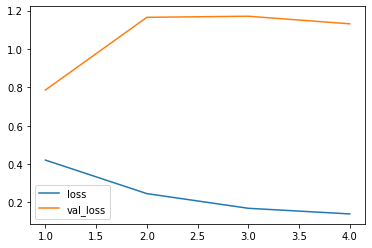

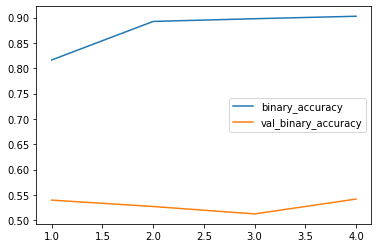

In [80]:
cıktı = pd.DataFrame(wxy.history)

cıktı.loc[1:, ['loss','val_loss']].plot()
cıktı.loc[1:, ['binary_accuracy','val_binary_accuracy']].plot()

print(("En iyi Validation Loss: {:0.4f}"+\
       "\n En iyi Validation Accuracy: {:0.4f}")\
       .format(cıktı['val_loss'].min(),
               cıktı['val_binary_accuracy'].max()))